# Amenities' selection

#### In the amenities column of the apartment's dataset there are a lot of amenities provided. Since the amount is high and most of them has no impact on the price, we will perform a selection to work just with the most important ones.

In [1]:
import pandas as pd
import pickle
import numpy as np
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt
import re

### FEATURE SELECTION

In [2]:
with open(r"C:\Users\usuario\Desktop\Nebulova\Curso\Proyecto\Datos\Pickles\clean_data.pk", "rb") as file:
    dataset = pickle.load(file)

#### As explained, we will work just with the amenities column:

Text(0.5, 0, 'Count')

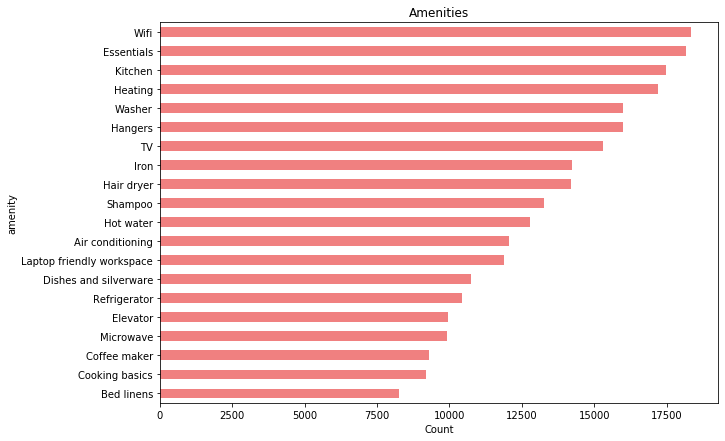

In [3]:
results = Counter()
dataset['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)
comunes = results.most_common()
# We create a table to plot it:
sub_df = pd.DataFrame(comunes, columns=['amenity', 'count'])
# To see the 20 most common:
sub_df.sort_values(by=['count'], ascending=True).tail(20).plot(kind='barh', x='amenity', y='count',  
                                                      figsize=(10,7), legend=False, color='lightcoral',
                                                      title='Amenities')
plt.xlabel('Count')

#### In the dataset we have 21739 rows, so almost half of them have these amenities above. This means that they won't have a significant impact on the price.

Text(0.5, 0, 'Count')

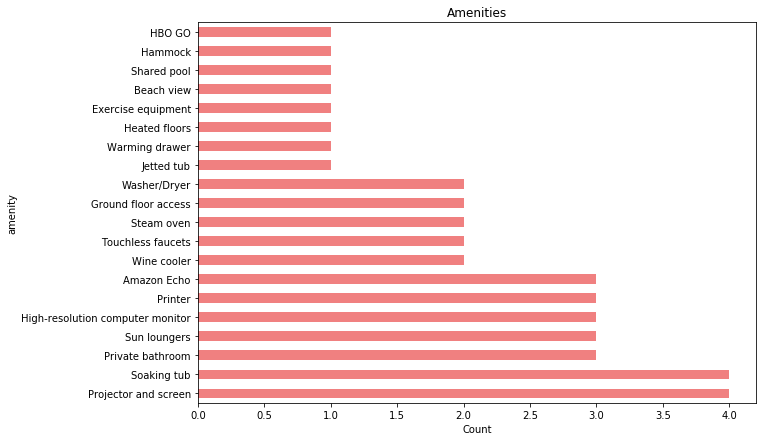

In [4]:
# To see the 20 less common:
sub_df.sort_values(by=['count'], ascending=False).tail(20).plot(kind='barh', x='amenity', y='count',  
                                                      figsize=(10,7), legend=False, color='lightcoral',
                                                      title='Amenities')
plt.xlabel('Count')

#### When we plot the less common ones, we see that just a few apartments have these amenities, so they won't have a significant impact on the price either. They won't be useful when predicting the price.

#### To decide which ones to remove, we will create a column with the percentage of apartments/rooms with this amenity:

In [6]:
cantidad = dataset.shape[0]
sub_df["Percentage"] = sub_df["count"].apply(lambda x: x / cantidad * 100)

#### Then, we remove those amenities included in more than 50% of the apartments/rooms and those included in less that 1% of them:

In [7]:
#Vamos a eliminar los amenities que tengan más del 50% de los alojamientos y los que tengan menos
#del 1%
amenities = []
for fila in sub_df.iterrows():
    if (fila[1]["Percentage"] < 50) and (fila[1]["Percentage"] > 1):
        amenities.append(fila[1]["amenity"])

#### We will be working with 74 amenities out of 179.

#### We save the list with the amenities selected to work with it later:

In [8]:
with open(r"C:\Users\usuario\Desktop\Nebulova\Curso\Proyecto\Datos\Pickles\amen_elegidas.pk", "wb") as file:
    pickle.dump(amenities, file) 